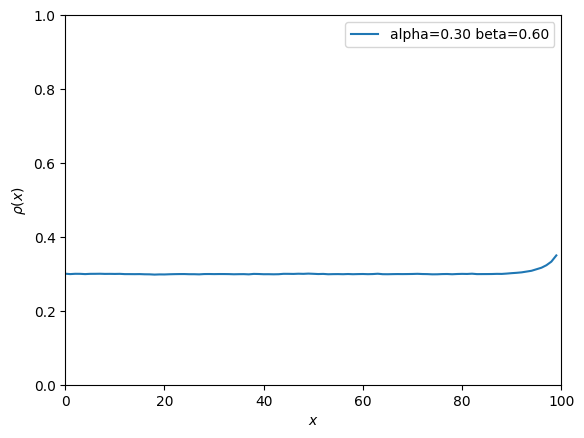

In [2]:
##Low density

import matplotlib.pyplot as plt
import numpy as np

def step(state, alpha, beta):

    """
    Perform one step of the TASEP simulation.

    Args:
        state (np.array): Current state of the lattice.
        alpha (float): Entry rate at the left boundary.
        beta (float): Exit rate at the right boundary.

    Returns:
        np.array: Updated state of the lattice.
    """

    L = len(state)
    x = np.random.choice(L)
    if x == 0:
        if state[x] == 0 and np.random.random() <= alpha:
            state[x] = 1
        elif state[x] == 1 and state[x + 1] == 0:
            state[x] = 0
            state[x + 1] = 1
    elif x == L - 1:
        if np.random.random() <= beta:
            state[L - 1] = 0
    else:
        if state[x] == 1 and state[x + 1] == 0:
            state[x] = 0
            state[x + 1] = 1
    return state

def run(L, alpha, beta, Nmax, Ninit):


    """
    Run the TASEP simulation.

    Args:
        L (int): Length of the lattice.
        alpha (float): Entry rate at the left boundary.
        beta (float): Exit rate at the right boundary.
        Nmax (int): Total number of steps.
        Ninit (int): Number of steps to skip before measuring.

    Returns:
        np.array: Average density profile.
    """
    state = np.zeros(L, dtype="int")
    n = 0
    rho = np.zeros(L)
    rhocnt = 0
    while n < Nmax:
        state = step(state, alpha, beta)
        if n > Ninit:
            rho = rho + state
            rhocnt += 1
        n += 1
    return rho / rhocnt

L = 100
Nmax = 2000000 * L
Ninit = 100000 * L
alpha1 = 0.3  # Adjusted value for alpha
beta1 = 0.6   # Adjusted value for beta
rho1 = run(L, alpha1, beta1, Nmax, Ninit)

plt.figure()
plt.plot(range(L), rho1, label='alpha={:.2f} beta={:.2f}'.format(alpha1, beta1))
plt.ylim((0, 1))
plt.xlim(0, 100)
plt.xlabel(r'$x$')
plt.ylabel(r'$\rho(x)$')
plt.legend()
plt.show()